<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Breast_Cancer.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Breast Cancer Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Binary classification | Predict if a tumor is benign or malignant |


## About the dataset

The [Breast Cancer][1] dataset is used for multivariate binary classification. There are 569 total samples with 30 features each. Features were computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image.

![](images/breast-cancer-logo.jpg)

[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## Package setup

In [1]:
#DO THE NECESSARY IMPORTS
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA

# Display plots inline, change default figure size and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data
**EXERCISE: In a similar was as you did with iris and wine ;).**

In [2]:
dataset = load_breast_cancer()

In [3]:
# Put data in a pandas DataFrame
df_breast = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
# Add target and class to DataFrame
df_breast['target'] = dataset.target
df_breast['target'] = df_breast['target'].replace({0:'malignant', 1:'benign'})
print(df_breast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Since the original labels are in 0,1 format, we could change the labels to benign and malignant using .replace function. Using inplace=True will modify the dataframe breast_dataset.
**Optional**

In [6]:
#df_breast['target'].replace(0, 'Malignant',inplace=True)
#df_breast['target'].replace(1, 'Benign',inplace=True)
#if we do this we should also drop the class
#df=df.drop("class")
#df_breast.head()

## Visualizing the Breast Cancer data

### Select your X and y's

In [7]:
# YOUR CODE HERE
Y = df_breast['target']# 'malignant or benign'
X = df_breast.drop('target', axis=1)
print(X.describe())
print(X.head())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

### Step 2: Normalize the data in X

In [8]:

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


### Optional

Convert this to a pandas dataframe again in order to visualize it. 

In [9]:
df_X = pd.DataFrame(X_scaled)
print(df_X.head())

         0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9   ...        20        21        22        23  \
0  2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601  2.001237   
1  0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126  1.890489   
2  2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475  1.456285   
3  1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939 -0.550021   
4  1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539  1.220724   

         24        25        26        27        28        29  
0  1

### Short exercise
Let's check whether the normalized data has a mean of zero and a standard deviation of one. **Those are indicators of proper normalization**

In [10]:
np.mean(df_X),np.std(df_X)

(0    -3.162867e-15
 1    -6.530609e-15
 2    -7.078891e-16
 3    -8.799835e-16
 4     6.132177e-15
 5    -1.120369e-15
 6    -4.421380e-16
 7     9.732500e-16
 8    -1.971670e-15
 9    -1.453631e-15
 10   -9.076415e-16
 11   -8.853492e-16
 12    1.773674e-15
 13   -8.291551e-16
 14   -7.541809e-16
 15   -3.921877e-16
 16    7.917900e-16
 17   -2.739461e-16
 18   -3.108234e-16
 19   -3.366766e-16
 20   -2.333224e-15
 21    1.763674e-15
 22   -1.198026e-15
 23    5.049661e-16
 24   -5.213170e-15
 25   -2.174788e-15
 26    6.856456e-16
 27   -1.412656e-16
 28   -2.289567e-15
 29    2.575171e-15
 dtype: float64,
 0     1.0
 1     1.0
 2     1.0
 3     1.0
 4     1.0
 5     1.0
 6     1.0
 7     1.0
 8     1.0
 9     1.0
 10    1.0
 11    1.0
 12    1.0
 13    1.0
 14    1.0
 15    1.0
 16    1.0
 17    1.0
 18    1.0
 19    1.0
 20    1.0
 21    1.0
 22    1.0
 23    1.0
 24    1.0
 25    1.0
 26    1.0
 27    1.0
 28    1.0
 29    1.0
 dtype: float64)

## Apply the PCA Method

In [12]:
#do the necessary imports
pca_breast = PCA(n_components=2)

principle_component = pca_breast.fit_transform(df_X)


In [13]:
df_principal_breast = pd.DataFrame(principle_component, columns=["principal component 1","principal component 2"])
print(df_principal_breast.tail())

     principal component 1  principal component 2
564               6.439315              -3.576817
565               3.793382              -3.584048
566               1.256179              -1.902297
567              10.374794               1.672010
568              -5.475243              -0.670637


Next, let's create a **new DataFrame** that will have the principal component values for all the samples.

In [14]:
#df_principal_breast = pd.DataFrame()

Once you have the principal components, you can find the **explained_variance_ratio**. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [15]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the principal component 1 holds **44.2%** of the information while the principal component 2 holds only **19%** of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

## Plotting the visualization

<Figure size 432x288 with 0 Axes>

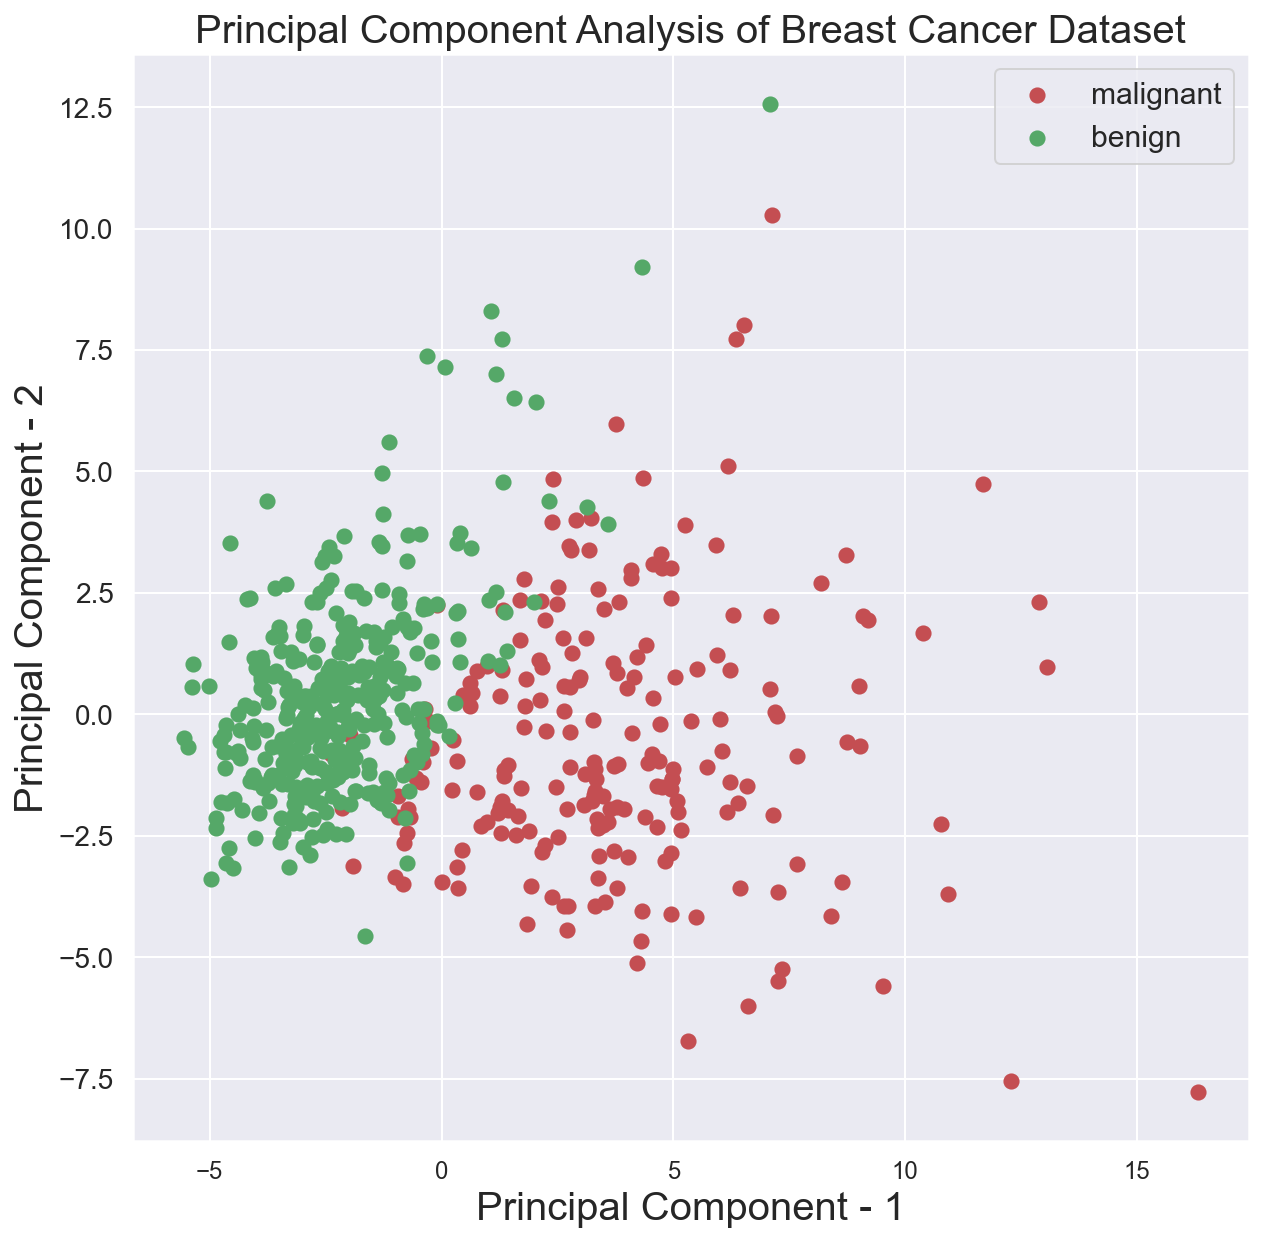

In [19]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['malignant','benign']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_breast['target'] == target
    plt.scatter(df_principal_breast.loc[indicesToKeep, 'principal component 1']
               , df_principal_breast.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_breast['target'] == target
    plt.scatter(df_principal_breast.loc[indicesToKeep, 'principal component 1']
               , df_principal_breast.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### Additional Challenge: Can you fix the labels in the plot so they are the original classes? 
Benign and Malign instead of 1 and 0